# Investigate patient no show appointment database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
●  the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.



## Questions

What are the key factors that influence whether patients attend their appointments or not?
1. Is there a correlation between age and the number of no-shows?
2. Is there any specific scheduled time (hour or day) when patients tend to not show up for their appointments frequently?
3. Which types of patients are more likely to miss their appointments - those with hypertension, diabetes, or alcoholism?(correlation)

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

In [2]:
#load the dataset
df = pd.read_csv('C:\\Users\\Admin\\Documents\\Nanodegree\\noshowappointments.csv')
#
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
#statistical summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#check if there are missed values
df.isna().count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hypertension      110527
Diabetes          110527
Alcoholism        110527
Handicap          110527
SMS_received      110527
No-show           110527
dtype: int64

In [6]:
# check if there is duplicate data  
df.duplicated().sum()

0

no missing values or duplicate values found  

In [7]:
#exclude patient with age  =-1 (wrong entry)
df.drop(df[df['Age'] == -1].index, inplace = True)
#check if it is remove the row of -1 age
print(df.shape)

(110526, 14)


In [8]:
# remove unused columns
df.drop(['PatientId', "AppointmentID", 'Neighbourhood', 'Handicap' ], axis= 1 , inplace= True)

### Main question: What are the key factors that influence whether patients attend their appointments or not?

<a id='eda'></a>
## Exploratory Data Analysis

### General overview of the dataset

In [9]:
#check the percentage of patients who attend and absent
attendence = df['No-show']
counts = attendence.value_counts()
percent = attendence.value_counts(normalize=True)
percent100 = attendence.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
No,88207,0.798066,79.8%
Yes,22319,0.201934,20.2%


Text(0.5, 1.0, 'The count of attendence among patients')

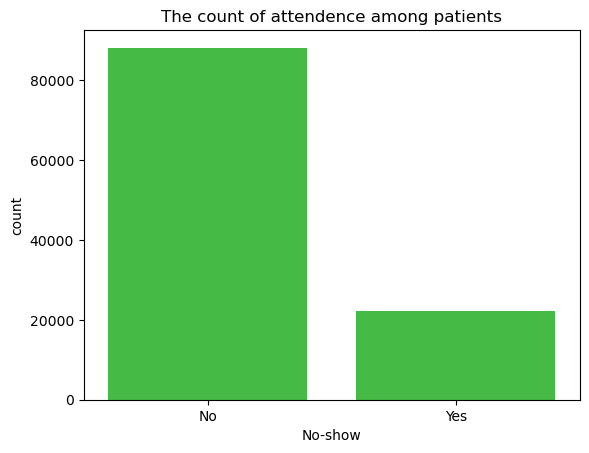

In [10]:
#visulize the distrubtion of patients 
sns.countplot(data= df,x="No-show", color = 'limegreen')
plt.title('The count of attendence among patients')

Approximately 20% of patients did not attend their appointments on the scheduled day.

#### Visualize the overall variables that may influence attendance

In [11]:
#asssign the show and no show in different variables
attend = df['No-show'] == 'No'
absent = df['No-show'] == 'Yes'

In [12]:
#observe the precentage of different variables among all patients
clinical_count= df[['Scholarship','Gender', 'Hypertension','Diabetes','Alcoholism','SMS_received' ]]
df2 = clinical_count.melt(value_vars=clinical_count.columns)
df2 = df2[df2["value"] !=0]
counts = df2.value_counts()

percent100 =counts/110526*100 
pd.DataFrame({'counts': counts, 'per100': percent100})

counts     per100
variable     value                   
Gender       F       71839  64.997376
             M       38687  35.002624
SMS_received 1       35482  32.102854
Hypertension 1       21801  19.724771
Scholarship  1       10861   9.826647
Diabetes     1        7943   7.186544
Alcoholism   1        3360   3.040009

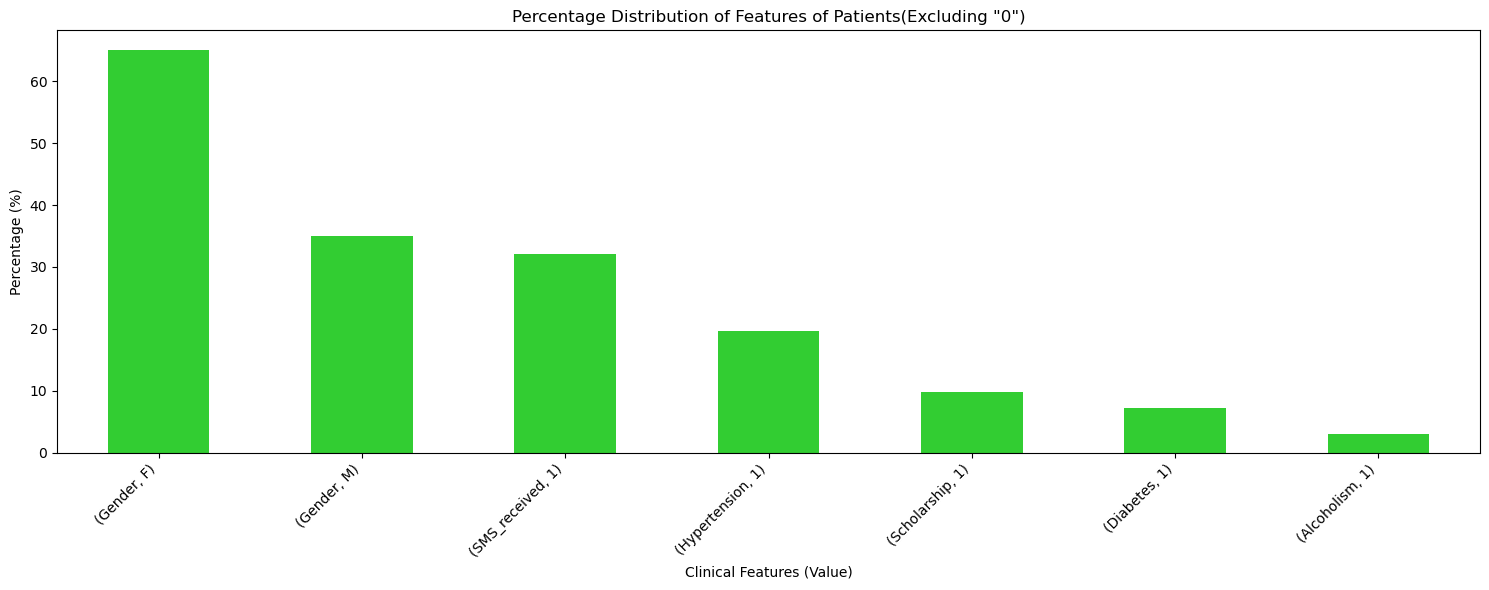

In [13]:
# Create a bar chart for the precentage of different variables among all patients
plt.figure(figsize=(15, 6))
percent100.plot(kind='bar', color='limegreen')
plt.xlabel('Clinical Features (Value)')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Features of Patients(Excluding "0")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [14]:
#observe the precentage of different variables among the absent patients
clinical_counts= df[absent][['Gender',
       'Scholarship', 'Hypertension','Diabetes','Alcoholism','SMS_received' ]]
df2s = clinical_counts.melt(value_vars=clinical_counts.columns)
df2s = df2s[df2s["value"]!=0]
countss = df2s.value_counts()

percent100s =countss/22319*100
pd.DataFrame({'counts': countss, 'per100': percent100s})


,,counts,per100
variable,value,,
Gender,F,14594,65.388234
SMS_received,1,9784,43.837089
Gender,M,7725,34.611766
Hypertension,1,3772,16.900399
Scholarship,1,2578,11.550697
Diabetes,1,1430,6.407097
Alcoholism,1,677,3.033290


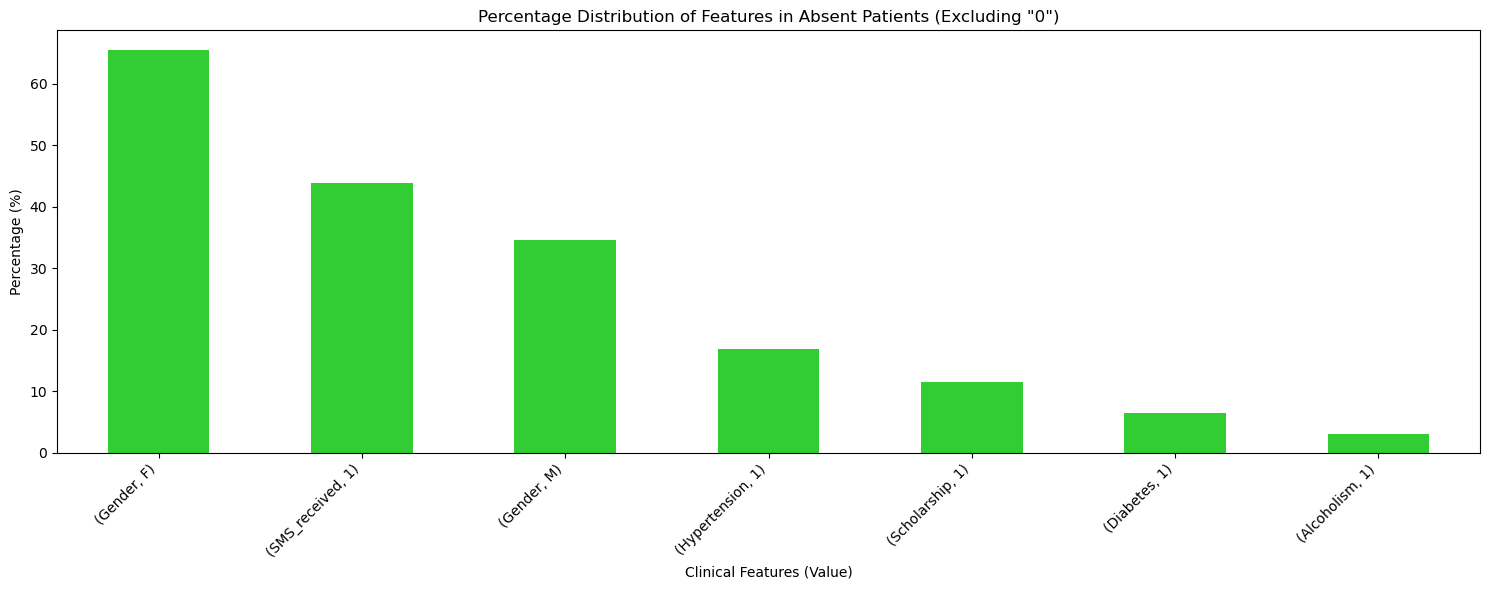

In [15]:
# Create a bar chart
plt.figure(figsize=(15, 6))
percent100s.plot(kind='bar', color='limegreen')
plt.xlabel('Clinical Features (Value)')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Features in Absent Patients (Excluding "0")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

 Based on the table and bar chart, we can draw the following observations about overall patients and those who did not show up for their appointments:

1. The number of female patients is higher than male patients, but there is no significant difference between the attendance or absence of the two genders.

2. The frequency of all patients and those who did not show up is the same for different variables like receiving SMS reminders and alcoholism.

3. More than half of the patients did not receive a reminder via SMS, and there is no significant difference between the two groups.
However, we cannot confirm any conclusions based solely on these observations.

### Q1: Is there a correlation between age and the number of no-shows?

Text(0.5, 1.0, "distribution of  patients'age ")

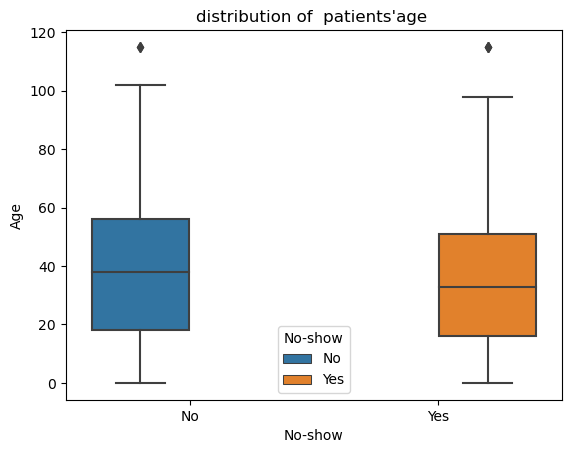

In [16]:
#visualize the age distribution of patients who attended and those who were absent
sns.boxplot(data=df, x="No-show", y="Age", hue="No-show")#creat boxplotplt.xlabel('Clinical Features (Value)')
plt.title('distribution of  patients\'age ')

The box plot displays that the median age of attended patients(No) is higher than that of absent patients, indicating that older patients are more likely to show up.

### Q2:  Is there any specific scheduled time (hour or day) when patients tend to not show up for their appointments frequently?

In [17]:
import time #import time library
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['hour'] = df['ScheduledDay'].dt.hour #extract hours from the ScheduledDay column and creat new cloumn

In [18]:
df['hour'].head(10)#check the values in hour column

0    18
1    16
2    16
3    17
4    16
5     8
6    15
7    15
8     8
9    12
Name: hour, dtype: int64

Text(0.5, 1.0, 'Patient Appointment Scheduling Distribution by Hour')

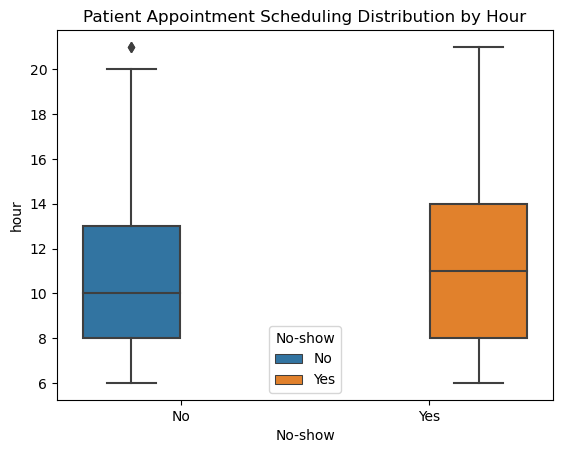

In [19]:
#plot the distrubtion of hour in two groups
sns.boxplot(data=df, x="No-show", y="hour", hue="No-show")
plt.title("Patient Appointment Scheduling Distribution by Hour")

The median appointment hour for no-shows seems to be later in the day compared to appointments attended (based on the higher median line in the "No-Show" box). This suggests a trend where appointments scheduled for later hours might have a higher rate of no-shows.

In [20]:
#check if certain day is more likely to cancel the appointment
df['day_of_week'] = df['ScheduledDay'].dt.day_name() #extract week days from the ScheduledDay column and creat new cloumn
df['day_of_week'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: day_of_week, dtype: object

In [21]:
df['day_of_week'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: day_of_week, dtype: int64

note:Saturday has a very small number of patients overall, and in the next analysis, it will be counted as 0.

In [22]:
#counts the frequency each day that patients scheduling the appointments among attended and absent ones
att_day= df[attend]['day_of_week'].value_counts()
absc_day = df[absent]['day_of_week'].value_counts()

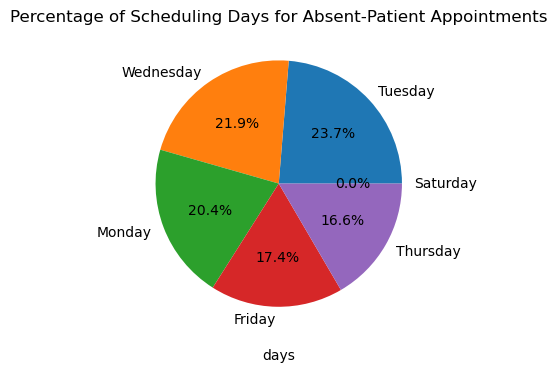

In [23]:
#plot the percentage of absence in each day of week
plt.figure(figsize=(16,4))
days= absc_day.index
plt.pie(absc_day, autopct='%1.1f%%', labels = days)
plt.xlabel('days')
plt.title("Percentage of Scheduling Days for Absent-Patient Appointments")
plt.show()

The pie chart shows that on most days, patients’ absences are highest on Tuesdays, followed by Wednesdays and Mondays. 

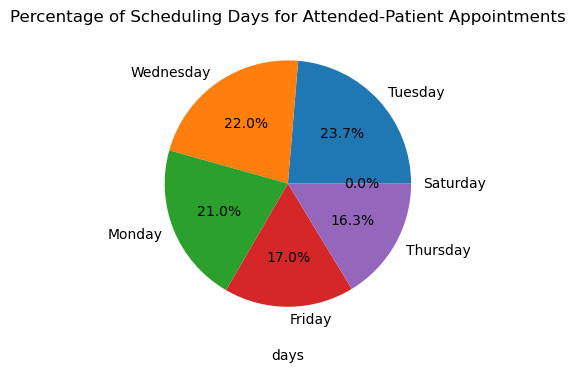

In [24]:
plt.figure(figsize=(16,4))
days= att_day.index
plt.pie(att_day, autopct='%1.1f%%', labels = days)
plt.xlabel('days')
plt.title("Percentage of Scheduling Days for Attended-Patient Appointments")
plt.show()

The pie chart indicates a similar proportion of present appointments to absent ones

### Q3: Which types of patients are more likely to miss their appointments - those with hypertension, diabetes, or alcoholism?

In [25]:
#covert no show column values to binary , co can be used for chi2 test
## Create a dictionary for mapping 'Yes' to 0 and 'No' to 1
mapping = {'Yes': 0, 'No': 1}
# Replace values in the no-show column using the mapping dictionary
df['No-show'] = df['No-show'].replace(mapping)

In [26]:
df['No-show']

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110526, dtype: int64

In [27]:
#Calculates the Chi-Square test for association between two binary variables.

import scipy.stats #import needed library for chi2 calculation
from scipy.stats import chi2
def calculate_chi2(df,no_show, other_col): 
    """
    This function takes a pandas DataFrame (`df`), the name of the column representing
    the first binary variable (`no_show`), and the name of the column representing
    the second binary variable (`other_col`) and returns a dictionary containing the
    Chi-Square statistic, p-value, degrees of freedom, and expected frequencies.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        no_show (str): The name of the column representing the first binary variable.
        other_col (str): The name of the column representing the second binary variable.

    Returns:
        dict: A dictionary containing the Chi-Square statistic, p-value, degrees of freedom,
              and expected frequencies
    """
    ct_table_ind=pd.crosstab(df[no_show], df[other_col])
    chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
    results = {"chi2_statistic": chi2_stat,
              "p_value": p_value, "degrees_of_freedom": dof, "expected_frequencies": expected}
    return results

In [28]:
#call the function
calculate_chi2(df, "No-show", "Scholarship")

{'chi2_statistic': 93.56699405193227,
 'p_value': 3.926815699103938e-22,
 'degrees_of_freedom': 1,
 'expected_frequencies': array([[20125.79062845,  2193.20937155],
        [79539.20937155,  8667.79062845]])}

In [29]:
if __name__ == "__main__":
    column_pairs = [("No-show", "Scholarship"), ("No-show", "SMS_received"), ("No-show", "Alcoholism"), 
                   ("No-show", "Diabetes"), ("No-show", "Hypertension")]  # List of column pairs
    for no_show, other_col in column_pairs:
        # Perform Chi-Square test for the current column pair
        results = calculate_chi2(df, no_show, other_col)
        chi2_stat = results["chi2_statistic"]
        p_value = results["p_value"]

        print(f"Testing association between {no_show} and {other_col}:")
        print(f"Chi2 statistic: {chi2_stat:.5g}")
        print(f"p-value: {p_value:.5g}")
        # Interpret the p-value for statistical significanc
        if p_value < 0.05: 
            print("There is a statistically significant association between the variables.")
        else:
            print("There is no statistically significant association between the variables.")
        print()  # Add a newline for better readability between tests

Testing association between No-show and Scholarship:
Chi2 statistic: 93.567
p-value: 3.9268e-22
There is a statistically significant association between the variables.

Testing association between No-show and SMS_received:
Chi2 statistic: 1766
p-value: 0
There is a statistically significant association between the variables.

Testing association between No-show and Alcoholism:
Chi2 statistic: 0.0019029
p-value: 0.96521
There is no statistically significant association between the variables.

Testing association between No-show and Diabetes:
Chi2 statistic: 25.327
p-value: 4.8396e-07
There is a statistically significant association between the variables.

Testing association between No-show and Hypertension:
Chi2 statistic: 140.67
p-value: 1.9011e-32
There is a statistically significant association between the variables.



Chi-squared tests have shown associations between no-shows and receiving an SMS, hypertension, diabetes, and scholarship, but no association with alcoholism.

<a id='conclusions'></a>
## Conclusion

After analyzing the dataset of no-show appointments, it has been observed that Approximately 20% of patients did not attend their appointments on the scheduled day. Moreover, the number of female patients is higher than male patients. From bar charts the frequency of all patients and those who did not show up is the same for different variables like receiving SMS reminders and alcoholism. Also, more than half of the patients did not receive a reminder via SMS. The median age of attended patients(No) is higher than that of absent patients, indicating that older patients are more likely to show up.  The median appointment hour for no-shows seems to be later in the day compared to appointments attended (based on the higher median line in the "No-Show" box). This suggests a trend where appointments scheduled for later hours might have a higher rate of no-shows.  On most days, patients’ absences are highest on Tuesdays, followed by Wednesdays and Mondays for both groups. However, we cannot confirm any conclusions based solely on these observations.
The Chi-Square test is condsider a poerful statistical tool for study association between two binary variables. Chi-squared tests have shown associations between no-shows and receiving an SMS, hypertension, diabetes, and scholarship, but no association with alcoholism.

limitation:
However, there is still more to discover in this dataset. Different statistical tests can be conducted to confirm the initial insights, and factors such as the neighborhood and handicap need to be studied, which may influence attendance. 